# Identifying Fraud From Enron Emails and Financial Data
##### - By Ratik Dugar

# Summary

##### 1.Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?

#### The goal of this project is using Machine learning in order to create a Person of interest(POI) identifier that performs as accurately as possible.ML models are useful here because we are trying to categorize our data based on the features each observation has and subsequently finding patterns such that the algorithm can learn and predict from it. 

### Dataset
#### In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. I  will build a person of interest identifier based on financial and email data made public as a result of the Enron scandal.  This data has been combined with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. 

### Exploration
#### After loading the dataset I explored the data both visually and programatically. Our first scatterplot between salary and bonus showed us an extreme outlier which happened to be the "Total" instead of a specific person so we removed it. After removing the outlier, our scatterplot looks a little more contained but there still seems to be 4 points that are a little out of the way from the rest. I explored these to make sure they are valid points and they indeed were from people who either had very high salries or high bonuses compared to their salaries. The 4 people in question here were [('SKILLING JEFFREY K'), ('LAY KENNETH L'), ('FREVERT MARK A'), ('PICKERING MARK R')]. We don't remove this from the dataset because even though they are outliers they are real, valid points without any data entry errors.
#### I also remove "The Travel Agency In The Park" from the dataset as this is not from a person. After this I am left with :
#### 146 people in the dataset
#### 18 features we start off with
#### 18 of the people are POIs
#### 126 of these people, on the other hand, are innocent.

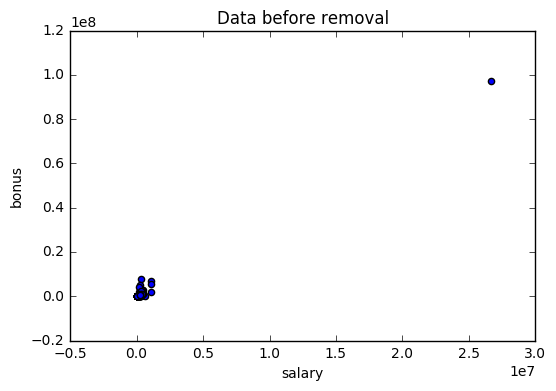

In [12]:
from IPython.display import Image
PATH = "C:/Users/rdugar/Desktop/udacity/machinelearning/"
Image(filename = PATH + "img1.png", width=400, height=500)

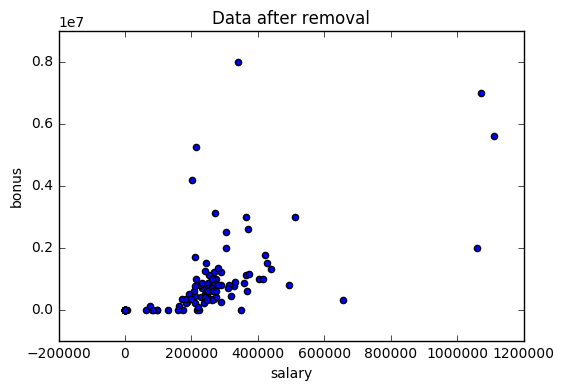

In [9]:
Image(filename = PATH + "img2.png", width=400, height=500)

# Feature Processing

##### 2.What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.

#### The features I started off with are :
##### ['poi','salary','bonus','director_fees','exercised_stock_options','expenses','loan_advances', 
#####  'long_term_incentive','other','restricted_stock','restricted_stock_deferred','total_payments',
#####  'total_stock_value','from_messages','from_poi_to_this_person','from_this_person_to_poi',
#####  'shared_receipt_with_poi','to_messages'] . Of these 'poi' serves as the label.
#### I used feature selection and engineering during the course of this project. I did not have to do any scaling. After removing the outliers in the dataset, I did not feel the need to perform any feature scaling.
#### In order to have a better idea from the email part of the dataset I created 2 new feature:
##### 'fraction_from_poi'-storing the fraction of emails a person gets from POIs using features 'from_poi_to_this_person' and 'from_messages' counts.
##### 'fraction_to_poi'-storing the fraction of emails a person sends to POIs using features 'from_this_person_to_poi' and 'to_messages' counts.
#### This also helps in dimensionality reduction (reducing the number of features I use). After this, I perform SelectKBest to find the most powerful, influential features. They are listed below:
##### exercised_stock_options    11.988504
##### total_stock_value          11.358885
##### fraction_to_poi             9.400834
##### expenses                    3.975391
##### salary                      3.379571
##### director_fees               1.809337
##### fraction_from_poi           1.734125
##### long_term_incentive         0.938294
##### restricted_stock            0.888408
##### bonus                       0.605160
##### shared_receipt_with_poi     0.193077
##### loan_advances               0.170360
##### restricted_stock_deferred   0.090394
##### other                       0.067895
##### total_payments              0.015773
#### I use a combination of the scores above, forward selection, backward selection and some manual trials based on intuition to select the features for each of my classifiers. 
#### For  my decision tree classifier which I eventually used as my final algorithm, I used the features 'fraction_to_poi' and 'shared_receipt_with_poi' features. I came up with this after using the classifier's attribute 'feature_importances' , and some iterative testing   to arrive at this list of features. This maximized by performance scores. The model had the following feature importances:
##### fraction_to_poi                0.558997
##### shared_receipt_with_poi  0.441003

# Machine Learning algorithms

##### 3.What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? 

#### I ended up using a Decision Tree Algorithm. Before selecting that as my final model, I used Guassian Naive-Bayes, Support Vector Machines(SVM) and K-Nearest Neighbors(K-NN) algorithms as well. The K-NN, Decision Tree and Guassian NB algorithms performed pretty well while the SVM didn't fare well at all. Of these, I think decision tree has the best performance because it has the best accuracy, precision and recall scores on the test set. On the entire StratifiedShuffleSplit cross validated test set, KNN does have better accuracy and precision but it has very wide apart precision and recall scores. On a dataset like this where the number of POIs are a lot less than the number of non-POIs, I expect the accuracy to be imbalanced in favor of predicting '0' or non-POI classfication. This is why I use precision, recall and f1 scores as my benchmarks while deciding my final classfier. The NB classifier does pretty well despite being so simple but it is not as good as the DT classifier. I decide to Decision tree for my final algorithm because both precision and recall scores are above 0.3 and pretty close to each other when run on the stratified test set. It also has the best results on the 30% split test set we use. I see the opportunity for some tuning here that could help me get even better performance.  

### Tuning

##### 4.What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well? How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  

#### Tuning the parameters of our algorithm helps us in optimizing our result. By using an iterative process of changing, testing and updating our parameters, we should get a fairly optimized result that satifies us. If we tune the parameters too much, it can cause our algorithm to have a very intricate decision boundary or can lead to overplotting. If we don't tune enough, our classifer will have some cross-contamination. We need to find the optimal setting which maximizes our performance metrics. Some algorithms don't have parameters and don't require tuning. GridSearchCV is a tool that we can use to tune our algorithm automatically as it finds us the best mix of parameters. For my decision tree classifer, I changed the 'min_samples_split' to 30 and 'min_samples_leaf' to 10 for my final model. These produced better precision and recall scores than the default parameters. I used GridSearchCV initially and also some manual trials to figure out the best mix of settings. 

# Evaluation

##### 5.What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis? 

#### Validation is a process of testing our algorithm on a dataset independent from the training dataset. This is normally done by splitting our data into train and test sets or using K-fold cross validation or StratifiedShuffleSplit cross validation. This also serves as a check on overfitting. 
#### A classic mistake is not splitting the data into separate train and test sets but training the algorithm on the entire dataset available. This leads to overfitting and the algorithm doesn't really learn to generalize accurately on unseen datasets. Testing it merely gives outputs that the algorithm has memorized during the training phase.
#### I validated all of my algorithms initially by using 30% test split. Once I selected the DT classfier as my final model, I used a 10 fold shuffled cross validation test set to get more accurate results. Finally, the project is tested on a Stratified Shuffle Split train/test set generator in order to maximize both training and testing data from a small dataset like this, which already has an existing imbalance in the number of POIs and non-POIs.

##### 6..Give at least 2 evaluation metrics and your average performance for each of them. Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.

#### On the Stratified Shuffle Split cross validation test, these are the performance metrics I got:
##### Accuracy score: 0.86
##### Precision score: 0.44
##### Recall score: 0.80
##### f1 score: 0.57
#### On a dataset like this where the number of POIs are a lot less than the number of non-POIs, I expect the accuracy to be imbalanced in favor of predicting '0' or a non-POI classification. This is why I stress more on precision and recall while evaluating the performance of my model. My identifier doesn’t have great precision, but it does have good recall. That means that, nearly every time a POI shows up in my test set, I am able to identify him or her. The cost of this is that I sometimes get some false positives, where non-POIs get flagged but as I said earlier, I chose to have better recall than precision while deciding on the tradeoff because I think it is important that the identifier doesn't miss a lot of guilty POIs from the get go from an investigative point of view. I would rather have more suspects and then narrow down as the investigation progresses than let a bunch of POIs escape just to have better precision . Having said that, our precision of 44%, although not as good as recall is not horrible. This means that of everyone classifed as a POI by the identifier, 44% actually end up as POIs in reality while 80% of all POIs in the dataset are caught by this algorithm. The F1 score, which is the harmonic average between the precision and recall scores, is 0.57. This shows that the overall performance of the algorithm is pretty decent. 